In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [17]:
#dataset_path = "HousingData.csv"
data = pd.read_csv("Iris.csv")

# Ensure the dataset contains only numeric features (remove target if included)
if 'Species' in data.columns:  # Assuming 'MEDV' is the target column
    data = data.drop('Species', axis=1)

if 'CHAS' in data.columns:  # Assuming 'MEDV' is the target column
    data = data.drop('CHAS', axis=1)

data = data.dropna()

# Normalize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply Fuzzy C-Means clustering
n_clusters = 3  # Define the number of clusters
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    scaled_data.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None
)

# Assign cluster membership
cluster_membership = np.argmax(u, axis=0)

# Add the cluster membership to the original data
data['Cluster'] = cluster_membership

data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Cluster
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,1
146,147,6.3,2.5,5.0,1.9,1
147,148,6.5,3.0,5.2,2.0,1
148,149,6.2,3.4,5.4,2.3,1


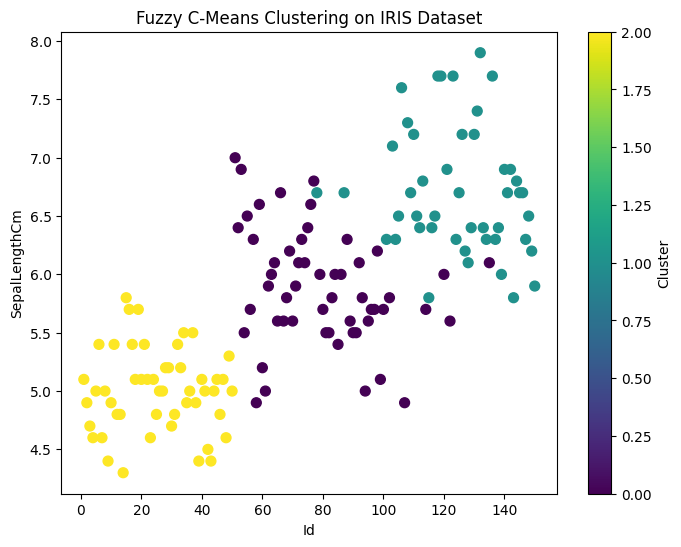

In [18]:
# Visualize the results (using the first two features for simplicity)
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title("Fuzzy C-Means Clustering on IRIS Dataset")
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])
plt.colorbar(label="Cluster")
plt.show()